# Jones Pupil Analysis

This example demonstrates how to perform a Jones pupil analysis in Optiland. The Jones pupil analysis visualizes the spatially resolved Jones matrix elements across the pupil, providing insight into the polarization properties of the optical system.

In [1]:
import matplotlib.pyplot as plt
from optiland.samples.objectives import CookeTriplet
from optiland.analysis import JonesPupil
from optiland.rays import PolarizationState
from optiland.visualization import OpticViewer

## 1. Setup the Optical System

We will use a standard Cooke Triplet for this demonstration.

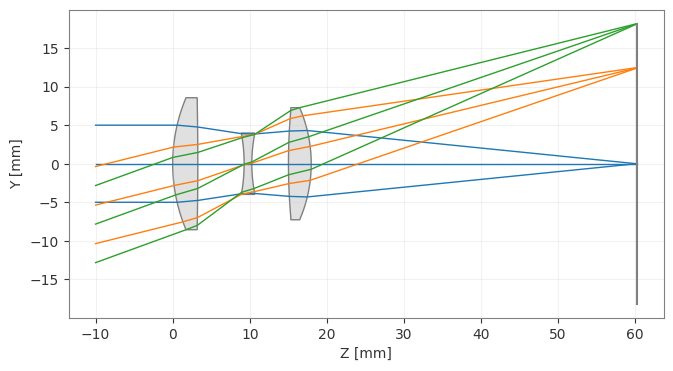

In [9]:
optic = CookeTriplet()

# Set polarization to unpolarized light
state = PolarizationState(is_polarized=False)
optic.set_polarization(state)

# Set Fresnel coatings for all surfaces
optic.surface_group.set_fresnel_coatings()

_ = optic.draw()

## 2. Basic Jones Pupil Analysis

We instantiate the `JonesPupil` analysis class with the optic and call the `view()` method. This generates a grid of plots showing the Real and Imaginary parts of the Jones matrix elements ($J_{xx}, J_{xy}, J_{yx}, J_{yy}$) across the pupil.

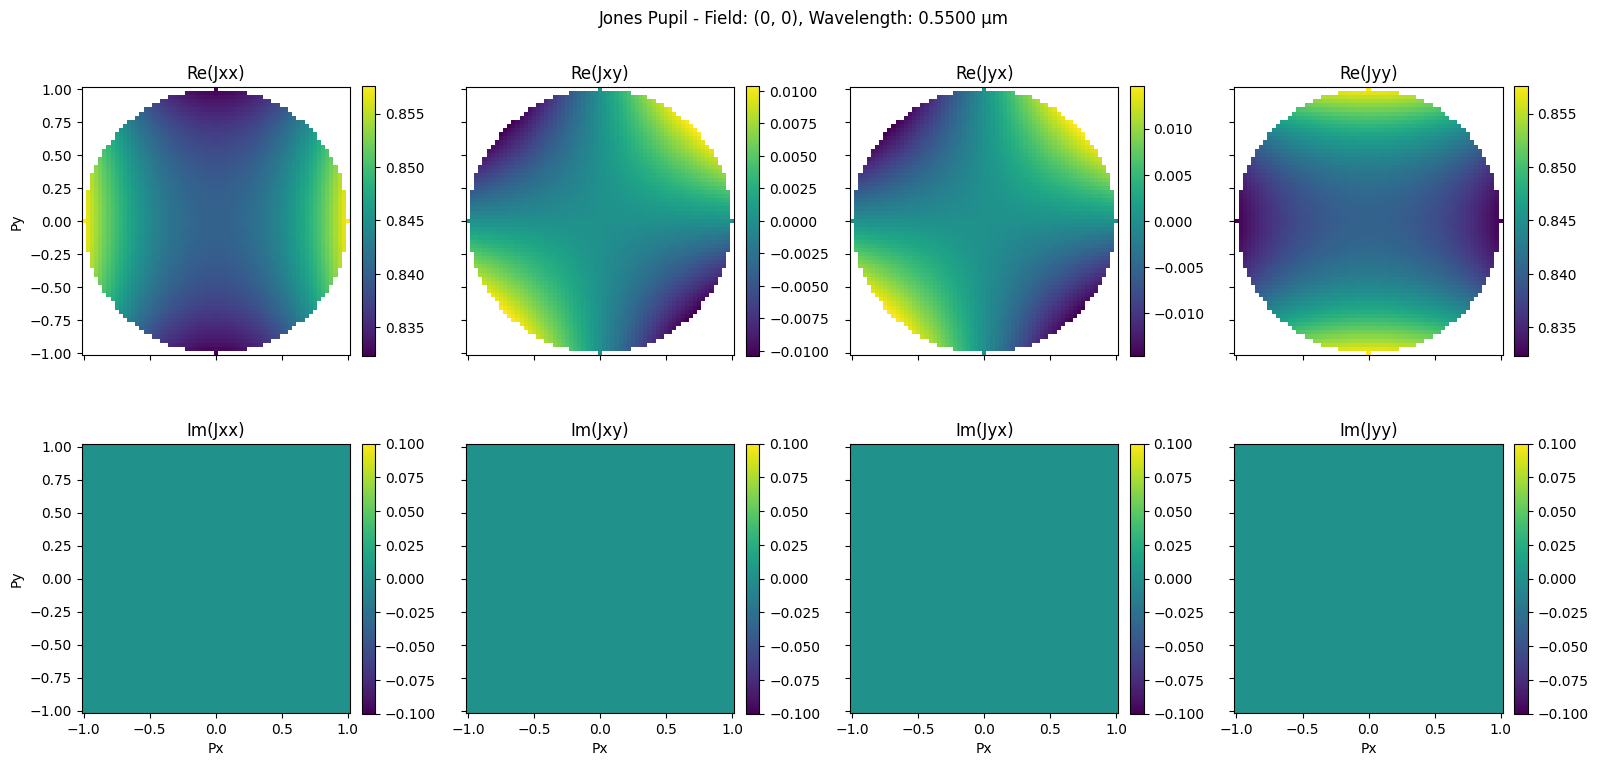

In [10]:
analysis = JonesPupil(optic)
fig, axs = analysis.view()
plt.show()

For an on-axis, rotationally symmetric system like the Cooke Triplet, the Jones Pupil reveals geometric polarization aberrations arising from Fresnel effects at curved interfaces.

* **Diagonal Terms ($J_{xx}, J_{yy}$):** These represent the primary transmission ($\approx 0.85$) but display a **saddle-like magnitude**. This occurs because the transmission for parallel-polarized light ($T_p$) is generally higher than for perpendicular-polarized light ($T_s$).
    * **$J_{xx}$**: Maximized along the X-axis (where light is $p$-polarized) and minimized along the Y-axis (where light is $s$-polarized).
    * **$J_{yy}$**: Rotated by $90^\circ$ relative to $J_{xx}$ (Maximized on Y, minimized on X).

* **Off-Diagonal Terms ($J_{xy}, J_{yx}$):** These terms represent polarization crosstalk (leakage). They form a characteristic **"Maltese Cross" pattern**, where leakage is zero along the cardinal axes ($X, Y$) and maximizes at the $\pm 45^\circ$ diagonals due to the geometric rotation of the plane of incidence.

## 3. Customizing the Analysis

We can customize the analysis by specifying fields, wavelengths, and the grid size.

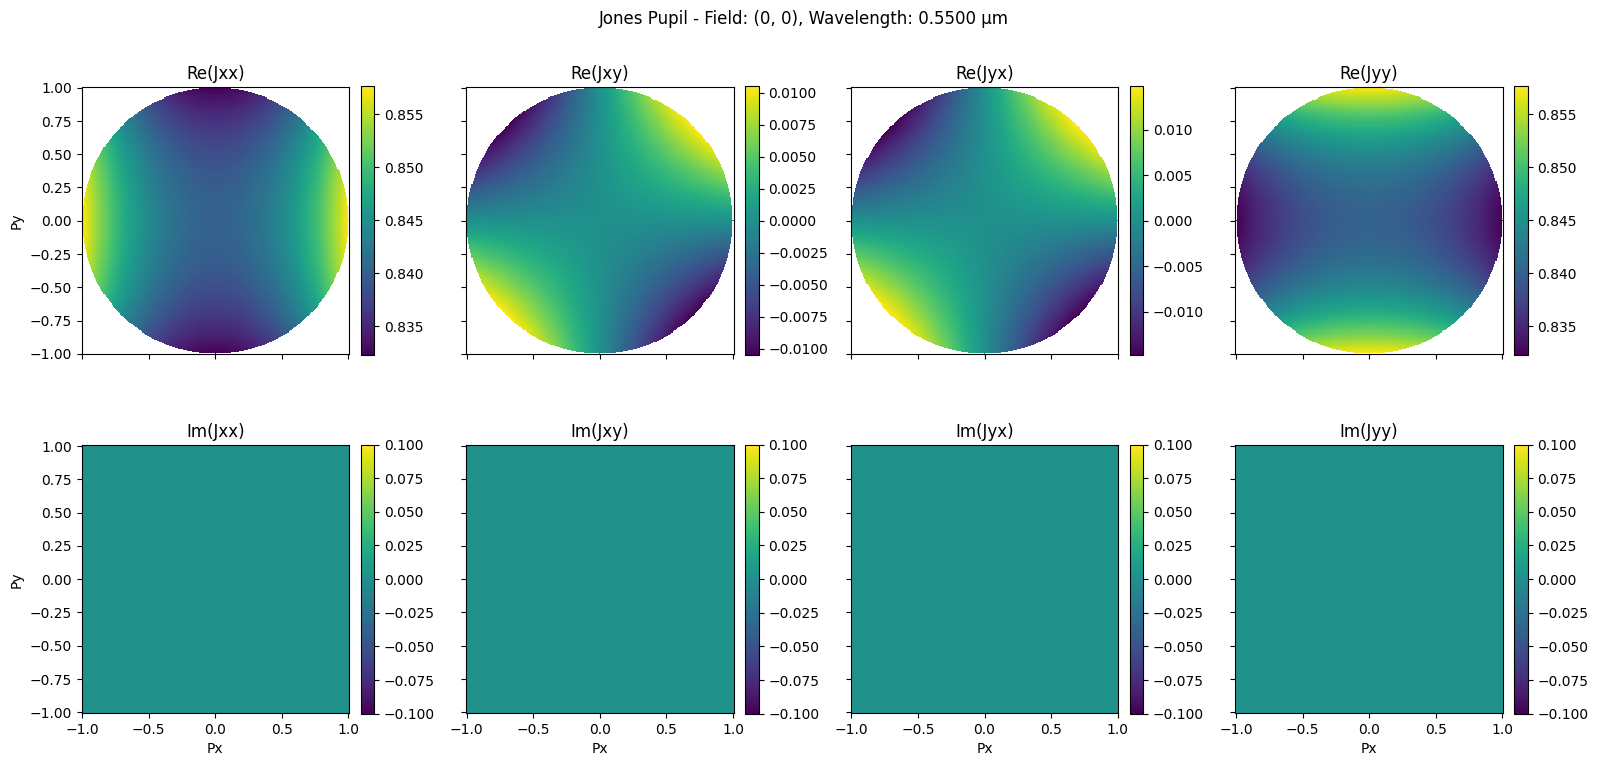

In [4]:
# Analyze at a specific wavelength and higher resolution
analysis_custom = JonesPupil(optic, wavelengths=[0.55], grid_size=257)
fig, axs = analysis_custom.view()
plt.show()

## 4. Off-Axis Field

Let's look at an off-axis field point. We first add a field to the optic if it doesn't exist, or pass it explicitly.

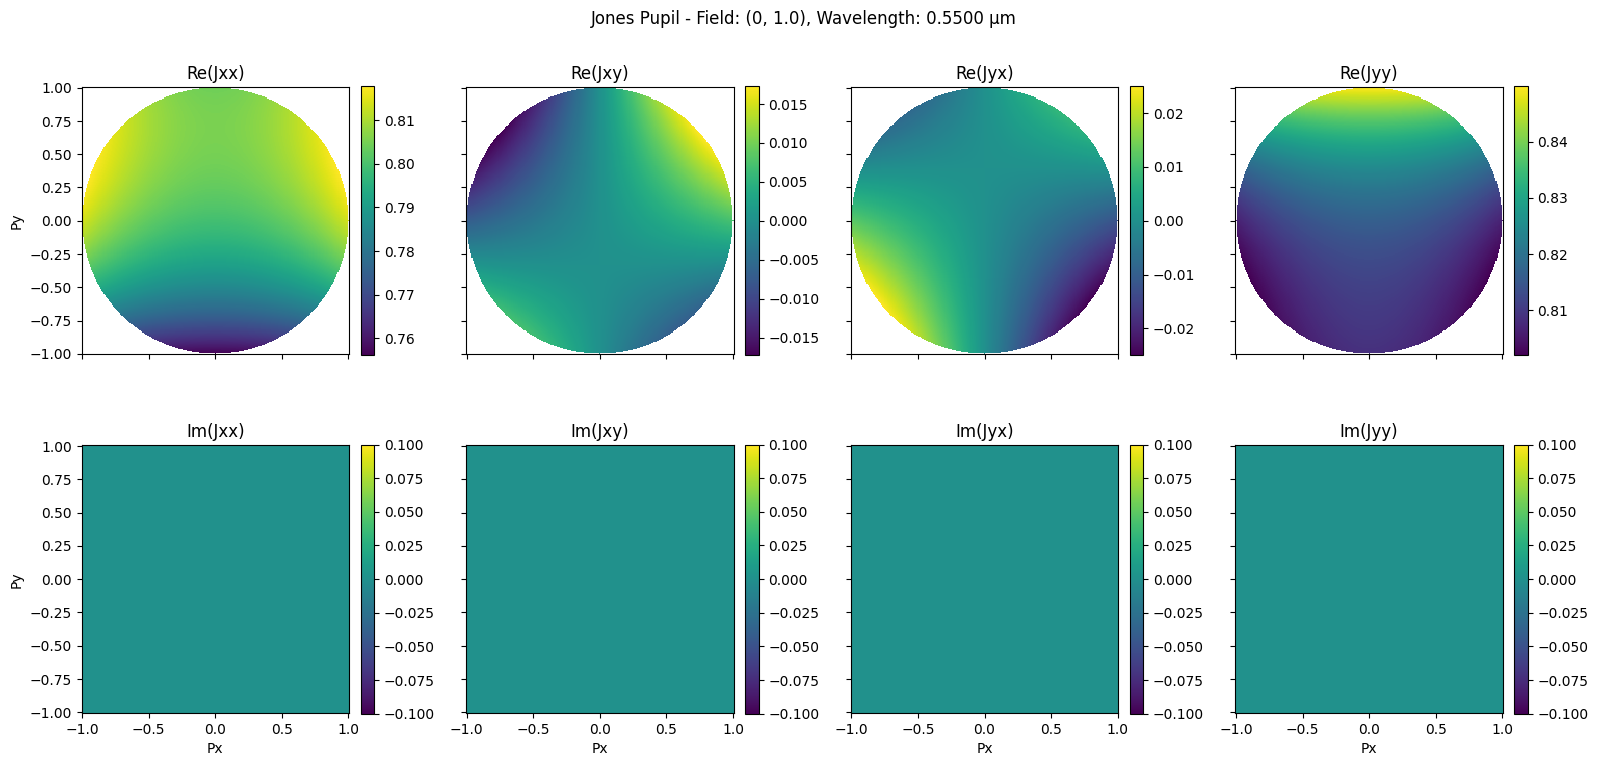

In [5]:
# Passing specific field coordinates (Hx, Hy)
analysis_off_axis = JonesPupil(optic, field=(0, 1.0), grid_size=257)
fig, axs = analysis_off_axis.view()
plt.show()